## 一、导入数据
### 1.1

In [1]:
import pandas as pd 
df = pd.read_csv('职位描述-副本.csv',encoding='gbk')
print(df)
print('==============================分隔线==============================',len(df))

                                        Job_Description  PositionId
0     职位描述 1、基于Android平台进行手机软件的设计、开发、需求分析等； 任职要求： 1、...           1
1      岗位描述1、前端框架的设计与实现 2. 各业务模块前端代码开发 3. 平台易用性与用户体验...           2
2     岗位职责： 1、负责日常款项支付，境内外网银转帐汇款，处理日常往来账核对； 2、负责公司及分...           3
3     \n 岗位职责： \n 1、负责日常款项支付，境内外网银转帐汇款，处理日常往来账核对； \n...           3
4      岗位职责： 1、无线通信系统性能测试与分析，包括常见标准无线通信系统与私有协议标准系统; ...           4
...                                                 ...         ...
9339  \n 1、熟悉TCP/IP、HTTP等协议， 对网络编程有较多认识并有相关性能优化经验； 2...        6169
9340  岗位职责： 1、负责面向公众用户市场的wifi应用产品的需求调研、规划、设计和全生命周期管理...        6170
9341  \n 岗位职责： \n 1、负责面向公众用户市场的wifi应用产品的需求调研、规划、设计和全...        6170
9342  岗位职责： 1、 负责公司广告产品线的产品规划、竞品分析及设计工作； 2、 负责与销售、市场...        6171
9343  \n 岗位职责： \n 负责公司wifi行业广告及大数据产品的规划、设计，负责相关技术平台架...        6171

[9344 rows x 2 columns]
==============================分隔线============================== 9344


## 二.对数据进行简单的统计分析
### 2.1 查看维度，类型，描述等

In [2]:
# 提取描述信息
comment = df.PositionId
print("shape:",comment.shape,"len:",len(comment))  
# 去重
comment1 = comment.drop_duplicates()  
print("去重后的评论数据维度：",comment1.shape,"len:",len(comment1)) 

shape: (9344,) len: 9344
去重后的评论数据维度： (6171,) len: 6171


In [3]:
df1 = df.drop_duplicates(['PositionId'])   
print(df1)

                                        Job_Description  PositionId
0     职位描述 1、基于Android平台进行手机软件的设计、开发、需求分析等； 任职要求： 1、...           1
1      岗位描述1、前端框架的设计与实现 2. 各业务模块前端代码开发 3. 平台易用性与用户体验...           2
2     岗位职责： 1、负责日常款项支付，境内外网银转帐汇款，处理日常往来账核对； 2、负责公司及分...           3
4      岗位职责： 1、无线通信系统性能测试与分析，包括常见标准无线通信系统与私有协议标准系统; ...           4
6     如果你是天生的冠军，那么这个职位正是为你而设。不论起点高与低，只要目标一致，你就是NO1。校...           5
...                                                 ...         ...
9335  职位描述 1.连锁餐饮/消费领域从业经验优先。组织制定、完善财务方面的管理制度及有关规定，并...        6167
9337  【 岗位职责】 1、负责公司软件产品的架构设计、代码编写和规范制订的工作； 2、负责软件研发...        6168
9338  1、熟悉TCP/IP、HTTP等协议， 对网络编程有较多认识并有相关性能优化经验； 2、有P...        6169
9340  岗位职责： 1、负责面向公众用户市场的wifi应用产品的需求调研、规划、设计和全生命周期管理...        6170
9342  岗位职责： 1、 负责公司广告产品线的产品规划、竞品分析及设计工作； 2、 负责与销售、市场...        6171

[6171 rows x 2 columns]


In [4]:
df1.dtypes   #查看表格数据类型

Job_Description    object
PositionId          int64
dtype: object

In [5]:
df1.describe()    #查看表格数据描述

,PositionId
count,6171.000000
mean,3086.000000
std,1781.558587
min,1.000000
25%,1543.500000
50%,3086.000000
75%,4628.500000
max,6171.000000


In [6]:
print("未去重前的缺失数据",df.isnull().sum())     #查看是否有缺失数据
print("去重后的缺失数据",df1.isnull().sum()) 

未去重前的缺失数据 Job_Description    241
PositionId           0
dtype: int64
去重后的缺失数据 Job_Description    236
PositionId           0
dtype: int64


### 2.2 因为工作描述中含有\n换行符等其他无效信息，所以将其去除

In [7]:
import re
def Delete_CertainSign(x):
    try:
        mode = re.compile(r"\+|\/|\-|\*|\s|\、|岗位职责|职位描述|：| | ，")
        return re.sub(mode,"",x)
    except Exception:
        return ""
df1["Job_Description"] = df1["Job_Description"].astype(str).apply(Delete_CertainSign)
display(df1)

<ipython-input-7-3c1e427de8e7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Job_Description"] = df1["Job_Description"].astype(str).apply(Delete_CertainSign)


,Job_Description,PositionId
0,1基于Android平台进行手机软件的设计开发需求分析等；任职要求1熟练掌握java技术，熟...,1
1,岗位描述1前端框架的设计与实现2.各业务模块前端代码开发3.平台易用性与用户体验的持续改进4...,2
2,1负责日常款项支付，境内外网银转帐汇款，处理日常往来账核对；2负责公司及分公司费用报销的核查...,3
4,1无线通信系统性能测试与分析，包括常见标准无线通信系统与私有协议标准系统;2射频系统性能预算...,4
6,如果你是天生的冠军，那么这个职位正是为你而设。不论起点高与低，只要目标一致，你就是NO1。校...,5
...,...,...
9335,1.连锁餐饮消费领域从业经验优先。组织制定完善财务方面的管理制度及有关规定，并监督执行根据公...,6167
9337,【】1负责公司软件产品的架构设计代码编写和规范制订的工作；2负责软件研发过程中的规范制订和文...,6168
9338,1熟悉TCPIPHTTP等协议，对网络编程有较多认识并有相关性能优化经验；2有PHP语言为主...,6169
9340,1负责面向公众用户市场的wifi应用产品的需求调研规划设计和全生命周期管理，包括移动客户端门...,6170


In [8]:
def Delete_Number(x):
    try:
        mode = re.compile(r"\d+")
        return re.sub(mode,"",x)
    except Exception:
        return ""
df1["Job_Description"] = df1["Job_Description"].astype(str).apply(Delete_Number)
display(df1)

<ipython-input-8-71af83561859>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Job_Description"] = df1["Job_Description"].astype(str).apply(Delete_Number)


,Job_Description,PositionId
0,基于Android平台进行手机软件的设计开发需求分析等；任职要求熟练掌握java技术，熟悉面...,1
1,岗位描述前端框架的设计与实现.各业务模块前端代码开发.平台易用性与用户体验的持续改进.Web...,2
2,负责日常款项支付，境内外网银转帐汇款，处理日常往来账核对；负责公司及分公司费用报销的核查及支...,3
4,无线通信系统性能测试与分析，包括常见标准无线通信系统与私有协议标准系统;射频系统性能预算与系...,4
6,如果你是天生的冠军，那么这个职位正是为你而设。不论起点高与低，只要目标一致，你就是NO。校园...,5
...,...,...
9335,.连锁餐饮消费领域从业经验优先。组织制定完善财务方面的管理制度及有关规定，并监督执行根据公司...,6167
9337,【】负责公司软件产品的架构设计代码编写和规范制订的工作；负责软件研发过程中的规范制订和文档撰...,6168
9338,熟悉TCPIPHTTP等协议，对网络编程有较多认识并有相关性能优化经验；有PHP语言为主的大...,6169
9340,负责面向公众用户市场的wifi应用产品的需求调研规划设计和全生命周期管理，包括移动客户端门户...,6170


In [9]:
df2 = df1.drop_duplicates(['Job_Description'])   #根据Job_Description再去重，查看去重后的数据
print(len(df2))
print(df2)

5418
                                        Job_Description  PositionId
0     基于Android平台进行手机软件的设计开发需求分析等；任职要求熟练掌握java技术，熟悉面...           1
1     岗位描述前端框架的设计与实现.各业务模块前端代码开发.平台易用性与用户体验的持续改进.Web...           2
2     负责日常款项支付，境内外网银转帐汇款，处理日常往来账核对；负责公司及分公司费用报销的核查及支...           3
4     无线通信系统性能测试与分析，包括常见标准无线通信系统与私有协议标准系统;射频系统性能预算与系...           4
6     如果你是天生的冠军，那么这个职位正是为你而设。不论起点高与低，只要目标一致，你就是NO。校园...           5
...                                                 ...         ...
9333  工作职责.根据市场需要，参与互联网产品发展规划产品设计；.熟悉互联网的运作模式及特征，对互联...        6166
9335  .连锁餐饮消费领域从业经验优先。组织制定完善财务方面的管理制度及有关规定，并监督执行根据公司...        6167
9338  熟悉TCPIPHTTP等协议，对网络编程有较多认识并有相关性能优化经验；有PHP语言为主的大...        6169
9340  负责面向公众用户市场的wifi应用产品的需求调研规划设计和全生命周期管理，包括移动客户端门户...        6170
9342  负责公司广告产品线的产品规划竞品分析及设计工作；负责与销售市场运营进行有效信息沟通和协调，共...        6171

[5418 rows x 2 columns]


In [10]:
df2['Job_Description'].unique()       #查看描述列的值

array(['基于Android平台进行手机软件的设计开发需求分析等；任职要求熟练掌握java技术，熟悉面向对象编程设计，具备扎实的编程基础；精通Android开发平台及框架原理；对面向对象开发有深入的理解;具备熟练的技术调研能力并能完成可行性说明；两年以上Android端移动互联网开发经验；必须具有熟练的即时通讯开发和消息推送开发经验具备良好的团队合作能力和沟通能力，有较强的自我提升和学习能力优先录用条件研究阅读过Android系统的源码具有移动支付网上银行或消息推送即时通讯等相关软件开发经验熟悉NDK编程并有相关经验',
       '岗位描述前端框架的设计与实现.各业务模块前端代码开发.平台易用性与用户体验的持续改进.Web前沿技术研究和新技术调研岗位要求.精通Web前端技术,包括HTMLCSSJavascript等.精通JS对象编程,并能熟练使用jquery进行动态网页开发.有基于Ajax或Jsonp的开发经验.对NodeJSHtml及其相关技术有一定了解；或者熟悉HTTP协议Apache模块cookie等Web技术；.技术视野广阔,乐于不断学习新知识与新技术,并能应用到实际工作中.个性乐观开朗,逻辑性强,乐于团队合作.Web前沿技术研究和新技术调研',
       '负责日常款项支付，境内外网银转帐汇款，处理日常往来账核对；负责公司及分公司费用报销的核查及支付；负责公司资金日报周报月报填报及发送，不定时汇报资金异常情况；负责总部及所有分公司的网银管理银企对账及资金分配；负责银行的日常对接和沟通，负责各类账户问题处理，如开销户外汇结售汇等；完成领导安排的其他工作。任职要求，出纳工作经验在年左右或以上，最少年最多不超过年，，工作稳定，不频繁跳槽的，有境外银行出纳工作经验优先，大专或以上优先电脑操作熟练；熟练使用财务软件WordExcel及运用其中各类函数，数据透视表等；工作细致，责任感强，具有良好的学习能力独立工作能力和财务分析能力；具备良好的沟通能力和团队精神，客观公正，保守秘密；广州本地户口优先考虑。',
       ...,
       '熟悉TCPIPHTTP等协议，对网络编程有较多认识并有相关性能优化经验；有PHP语言为主的大中型项目开发经验；优秀的数据库设计和优化能力，熟悉Mysql，MongoDB，Redis等；熟练应用一门或几门以下的

## 三.对数据进行处理，并且可视化

### 3.1. 编写文本去重函数

In [11]:

def condense_1(str):
	# 这里i代表每次处理的字符单位数，如i=1时处理“好好好好”的情况，i=2时处理“很好很好很好”的情况
	# i=1&i=2时用一种处理方式，即当重复数量>2时才进行压缩，因为出现“滔滔不绝”、“美的的确好”
	# 跟“容我思考思考”“这真的真的好看”等不好归为冗余的情况。但当出现3次及以上时基本就是冗余了。
	for i in [1, 2]:
		j = 0
		while j < len(str)-2*i:
			#判断重复了至少两次
			if str[j: j+i] == str[j+i: j+2*i] and str[j: j+i] == str[j+2*i: j+3*i]:
				k = j+2*i
				while k+i<len(str) and str[j: j+i]==str[k+i: k+2*i]:
					k += i
				str = str[: j+i] + str[k+i:]
			j += 1
		i += 1
	
	# i=3&i=4时用一种处理方式，当重复>1时就进行压缩，因为3个字以上时重复不再构成成语或其他常用语，
	# 基本上即使冗余了。因为大于五个字的重复比较少出现，为了减少算法复杂度可以只处理到i=4。
	for i in [3, 4, 5]:
		j = 0
		while j < len(str)-2*i:
			#判断重复了至少一次
			if str[j: j+i]==str[j+i: j+2*i]:
				k = j+i
				while k+i<len(str) and str[j: j+i]==str[k+i: k+2*i]:
					k += i
				str = str[: j+i] + str[k+i:]
			j += 1
		i += 1
	
	return str

### 3.2. 总评论文本去重以及长度统计

In [12]:

reviews=df2['Job_Description']
print(len(reviews))

len_comm_all=reviews.astype('str').apply(lambda x: len(x)).sum()  # 统计总评论的字符长度
print('统计总评论的字符长度',len_comm_all)

comment_allForC = reviews.astype('str').apply(lambda x: condense_1(x))  # 去除重复词
print(len(comment_allForC),type(comment_allForC))

len_comm_all_C=comment_allForC.apply(lambda x: len(x)).sum()# 文本去重复词后的长度汇总
print('文本去重后的长度汇总',len_comm_all_C)

#data1.iloc[14]  # 转换后效果
comment_allForC_ForL = comment_allForC.apply(lambda x: len(x))# 文本去重后的文本长度矩阵
print('123123123123',comment_allForC_ForL.head(),len(comment_allForC_ForL),type(comment_allForC_ForL))

comment_all_dataAndLen=pd.concat([comment_allForC,comment_allForC_ForL],axis=1)# 合并
comment_all_dataAndLen.columns = ['评论','长度']
print(comment_all_dataAndLen.head())
print(len(comment_all_dataAndLen))




5418
统计总评论的字符长度 1789788
5418 <class 'pandas.core.series.Series'>
文本去重后的长度汇总 1787519
123123123123 0     256
1     264
2     323
4     338
6    1036
Name: Job_Description, dtype: int64 5418 <class 'pandas.core.series.Series'>
                                                  评论    长度
0  基于Android平台进行手机软件的设计开发需求分析等；任职要求熟练掌握java技术，熟悉面...   256
1  岗位描述前端框架的设计与实现.各业务模块前端代码开发.平台易用性与用户体验的持续改进.Web...   264
2  负责日常款项支付，境内外网银转帐汇款，处理日常往来账核对；负责公司及分公司费用报销的核查及支...   323
4  无线通信系统性能测试与分析，包括常见标准无线通信系统与私有协议标准系统;射频系统性能预算与系...   338
6  如果你是天生的冠军，那么这个职位正是为你而设。不论起点高与低，只要目标一致，你就是NO。校园...  1036
5418


### 3.3 进行可视化

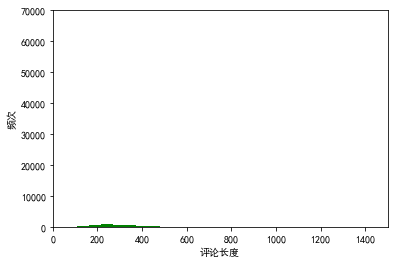

In [13]:

import matplotlib as mp
import matplotlib.pyplot as plt
#mp.use('qt5agg')
mp.rcParams['font.sans-serif']='SimHei'
mp.rcParams['font.family']='sans-serif'
plt.hist(comment_allForC_ForL,50,facecolor='g')
plt.xlabel('评论长度')
plt.ylabel('频次')
plt.axis([0,1500,0,70000])
plt.show()

In [14]:
# 截取长度大于50的作为有效描述
comment_all_dataAndLen['长度'].value_counts().sort_index()[:10]  # 长度前十的数量统计
comment_all_dataOver50 = comment_all_dataAndLen.loc[comment_all_dataAndLen['长度'] > 50, '评论']  # 筛选长度大于50的评论
print(comment_all_dataOver50.shape)
# print(comment_all_dataAndLen)
# 截取长度大于50的作为有效描述
comment_all_dataAndLen['长度'].value_counts().sort_index()[:10]  # 长度前十的数量统计
comment_all_dataOver50 = comment_all_dataAndLen.loc[comment_all_dataAndLen['长度'] > 50, '评论']  # 筛选长度大于50的评论
print(comment_all_dataOver50.shape)
# print(comment_all_dataAndLen['长度'])
# print(comment_all_dataAndLen['长度'].value_counts())

(5373,)
(5373,)


## 对工作描述进行分词和词性标注

In [15]:
import jieba
import jieba.posseg as psg

## 所有描述进行词性标注
comment_words_all= comment_all_dataOver50.apply(lambda x: list(psg.cut(x)))  
print(comment_words_all.head())


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\20713\AppData\Local\Temp\jieba.cache
Loading model cost 0.559 seconds.
Prefix dict has been built successfully.


0    [基于/p, Android/eng, 平台/n, 进行/v, 手机软件/n, 的/uj, ...
1    [岗位/n, 描述/v, 前端/f, 框架/n, 的/uj, 设计/vn, 与/p, 实现/...
2    [负责/v, 日常/d, 款项/n, 支付/v, ，/x, 境内外/s, 网银/nt, 转帐...
4    [无线通信/l, 系统/n, 性能/n, 测试/vn, 与/p, 分析/vn, ，/x, 包...
6    [如果/c, 你/r, 是/v, 天生/n, 的/uj, 冠军/n, ，/x, 那么/r, ...
Name: 评论, dtype: object


In [16]:
#分词
comment_words_all = comment_all_dataOver50.apply(lambda x: list(jieba.cut(x)))  
print(comment_words_all.head())

0    [基于, Android, 平台, 进行, 手机软件, 的, 设计, 开发, 需求, 分析,...
1    [岗位, 描述, 前端, 框架, 的, 设计, 与, 实现, ., 各, 业务, 模块, 前...
2    [负责, 日常, 款项, 支付, ，, 境内外, 网银, 转帐, 汇款, ，, 处理, 日常...
4    [无线通信, 系统, 性能, 测试, 与, 分析, ，, 包括, 常见, 标准, 无线通信,...
6    [如果, 你, 是, 天生, 的, 冠军, ，, 那么, 这个, 职位, 正是, 为, 你,...
Name: 评论, dtype: object


In [18]:
# 进行关键字提取

In [24]:
import math
import jieba
import jieba.posseg as psg
from gensim import corpora, models
from jieba import analyse
import functools


# 停用词表加载方法
def get_stopword_list():
    # 停用词表存储路径，每一行为一个词，按行读取进行加载
    # 进行编码转换确保匹配准确率
    stop_word_path = 'stopword.txt'
    stopword_list = [sw.replace('\n', '') for sw in open(stop_word_path,encoding='utf-8').readlines()]
#     print("============停用词表==========",stopword_list)
    return stopword_list


# 分词方法，调用结巴接口
def seg_to_list(sentence, pos=False):
    if not pos:
        # 不进行词性标注的分词方法
        seg_list = jieba.cut(sentence)
    else:
        # 进行词性标注的分词方法
        seg_list = psg.cut(sentence)
#     print(seg_list)
    return seg_list


# 去除干扰词
def word_filter(seg_list, pos=False):
    stopword_list = get_stopword_list()
    filter_list = []
    # 根据POS参数选择是否词性过滤
    ## 不进行词性过滤，则将词性都标记为n，表示全部保留
    for seg in seg_list:
        if not pos:
            word = seg
            flag = 'n'
        else:
            word = seg.word
            flag = seg.flag
        if not flag.startswith('n'):
            continue
        # 过滤停用词表中的词，以及长度为<2的词
        if not word in stopword_list and len(word) > 1:
            filter_list.append(word)
#     print("去除干扰词",filter_list)
    return filter_list


# 数据加载，pos为是否词性标注的参数，corpus_path为数据集路径
def load_data(pos=False, corpus_path='./corpus.txt'):
    # 调用上面方式对数据集进行处理，处理后的每条数据仅保留非干扰词
    doc_list = []
    for line in open(corpus_path, 'r',encoding='utf-8'):
        content = line.strip()
        seg_list = seg_to_list(content, pos)#调用分词方法进行分词，返回结果根据pos不同返回不同的分词结果
        filter_list = word_filter(seg_list, pos)#调用去除干扰词函数
        doc_list.append(filter_list)
#     print("数据加载",doc_list)
    return doc_list     # 返回去除干扰词之后的数据词集


# idf值统计方法
def train_idf(doc_list):
    idf_dic = {}
    # 总文档数
    tt_count = len(doc_list)
    # 每个词出现的文档数
    for doc in doc_list:
#         print("doc_",doc)
        for word in set(doc):      #set（doc)文档中词的唯一
#             print("========================word",word)   
            idf_dic[word] = idf_dic.get(word, 0.0) + 1.0  #统计词在文档中出现的文档个数

    # 按公式转换为idf值，分母加1进行平滑处理
    for k, v in idf_dic.items():
        idf_dic[k] = math.log(tt_count / (1.0 + v))
    # 对于没有在字典中的词，默认其仅在一个文档出现，得到默认idf值
    default_idf = math.log(tt_count / 1)
#     print("default_idf",default_idf)
#     print("idf_dic",idf_dic)
    return idf_dic, default_idf

#============================================================================================
#  排序函数，用于topK关键词的按值排序
def cmp(e1, e2):
    import numpy as np
    res = np.sign(e1[1] - e2[1])
    if res != 0:
        return res
    else:
        a = e1[0] + e2[0]
        b = e2[0] + e1[0]
        if a > b:
            return 1
        elif a == b:
            return 0
        else:
            return -1

# TF-IDF类
class TfIdf(object):
    # 四个参数分别是：训练好的idf字典，默认idf值，处理后的待提取文本，关键词数量
    def __init__(self, idf_dic, default_idf, word_list, keyword_num):
        self.word_list = word_list
        self.idf_dic, self.default_idf = idf_dic, default_idf
        self.tf_dic = self.get_tf_dic()
        self.keyword_num = keyword_num
    # 统计tf值
    def get_tf_dic(self):
        tf_dic = {}     #保存word的tf值，k：word  ，v：tf值
        #每个词出现的文档数
        for word in self.word_list:     
            tf_dic[word] = tf_dic.get(word, 0.0) + 1.0     #统计word在词表中出现的次数】
        #按公式转换为idf值，分母加1 进行计算
        tt_count = len(self.word_list) #词总数
        for k, v in tf_dic.items():    #计算每个word的tf值
            tf_dic[k] = float(v) / tt_count
        return tf_dic

    # 按公式计算tf-idf
    def get_tfidf(self):
        tfidf_dic = {}  #保存word的tf-idf值，k：word  ，v：tf-idf值
        for word in self.word_list: #迭代词
            idf = self.idf_dic.get(word, self.default_idf)
            tf = self.tf_dic.get(word, 0)
            tfidf = tf * idf
            tfidf_dic[word] = tfidf
        tfidf_dic.items()
        # 根据tf-idf排序，去排名前keyword_num的词作为关键词
        for k, v in sorted(tfidf_dic.items(), key=functools.cmp_to_key(cmp), reverse=True)[:self.keyword_num]:
            print(k + "/ ", end='')
        print()

#===================================================================================================
# 主题模型
class TopicModel(object):
    # 三个传入参数：处理后的数据集，关键词数量，具体模型（LSI、LDA），主题数量
    def __init__(self, doc_list, keyword_num, model='LSI', num_topics=4):
        # 使用gensim的接口，将文本转为向量化表示
        # 先构建词空间
        self.dictionary = corpora.Dictionary(doc_list)
        # 使用BOW模型向量化
        corpus = [self.dictionary.doc2bow(doc) for doc in doc_list]
        # 对每个词，根据tf-idf进行加权，得到加权后的向量表示
        self.tfidf_model = models.TfidfModel(corpus)
        self.corpus_tfidf = self.tfidf_model[corpus]

        self.keyword_num = keyword_num
        self.num_topics = num_topics
        # 选择加载的模型
        if model == 'LSI':
            self.model = self.train_lsi()
        else:
            self.model = self.train_lda()

        # 得到数据集的主题-词分布
        word_dic = self.word_dictionary(doc_list)
        self.wordtopic_dic = self.get_wordtopic(word_dic)

    def train_lsi(self):
        lsi = models.LsiModel(self.corpus_tfidf, id2word=self.dictionary, num_topics=self.num_topics)
        return lsi

    def train_lda(self):
        lda = models.LdaModel(self.corpus_tfidf, id2word=self.dictionary, num_topics=self.num_topics)
        return lda

    def get_wordtopic(self, word_dic):
        wordtopic_dic = {}

        for word in word_dic:
            single_list = [word]
            wordcorpus = self.tfidf_model[self.dictionary.doc2bow(single_list)]
            wordtopic = self.model[wordcorpus]
            wordtopic_dic[word] = wordtopic
        return wordtopic_dic

    # 计算词的分布和文档的分布的相似度，取相似度最高的keyword_num个词作为关键词
    def get_simword(self, word_list):
        sentcorpus = self.tfidf_model[self.dictionary.doc2bow(word_list)]
        senttopic = self.model[sentcorpus]

        # 余弦相似度计算
        def calsim(l1, l2):
            a, b, c = 0.0, 0.0, 0.0
            for t1, t2 in zip(l1, l2):
                x1 = t1[1]
                x2 = t2[1]
                a += x1 * x2
                b += x1 * x1
                c += x2 * x2
            sim = a / math.sqrt(b * c) if not (b * c) == 0.0 else 0.0
            return sim

        # 计算输入文本和每个词的主题分布相似度
        sim_dic = {}
        for k, v in self.wordtopic_dic.items():
            if k not in word_list:
                continue
            sim = calsim(v, senttopic)
            sim_dic[k] = sim

        for k, v in sorted(sim_dic.items(), key=functools.cmp_to_key(cmp), reverse=True)[:self.keyword_num]:
            print(k + "/ ", end='')
        print()

    # 词空间构建方法和向量化方法，在没有gensim接口时的一般处理方法
    def word_dictionary(self, doc_list):
        dictionary = []
        for doc in doc_list:
            dictionary.extend(doc)

        dictionary = list(set(dictionary))

        return dictionary

    def doc2bowvec(self, word_list):
        vec_list = [1 if word in word_list else 0 for word in self.dictionary]
        return vec_list


def tfidf_extract(word_list, pos=False, keyword_num=10):
    doc_list = load_data(pos)
    idf_dic, default_idf = train_idf(doc_list)
    tfidf_model = TfIdf(idf_dic, default_idf, word_list, keyword_num)
    tfidf_model.get_tfidf()


def textrank_extract(text, pos=False, keyword_num=10):
    textrank = analyse.textrank
    keywords = textrank(text, keyword_num)
    # 输出抽取出的关键词
    for keyword in keywords:
        print(keyword + "/ ", end='')
    print()


def topic_extract(word_list, model, pos=False, keyword_num=10):
    doc_list = load_data(pos)
    topic_model = TopicModel(doc_list, keyword_num, model=model)
    topic_model.get_simword(word_list)


In [25]:
print(comment_all_dataOver50)    #请问如何把9342条数据变成[基于, Android, 平台, 进行, 手机软件, 的, 设计, 开发, 需求, 分析]

0       基于Android平台进行手机软件的设计开发需求分析等；任职要求熟练掌握java技术，熟悉面...
1       岗位描述前端框架的设计与实现.各业务模块前端代码开发.平台易用性与用户体验的持续改进.Web...
2       负责日常款项支付，境内外网银转帐汇款，处理日常往来账核对；负责公司及分公司费用报销的核查及支...
4       无线通信系统性能测试与分析，包括常见标准无线通信系统与私有协议标准系统;射频系统性能预算与系...
6       如果你是天生的冠军，那么这个职位正是为你而设。不论起点高与低，只要目标一致，你就是NO。校园...
                              ...                        
9333    工作职责.根据市场需要，参与互联网产品发展规划产品设计；.熟悉互联网的运作模式及特征，对互联...
9335    .连锁餐饮消费领域从业经验优先。组织制定完善财务方面的管理制度及有关规定，并监督执行根据公司...
9338    熟悉TCPIPHTTP等协议，对网络编程有较多认识并有相关性能优化经验；有PHP语言为主的大...
9340    负责面向公众用户市场的wifi应用产品的需求调研规划设计和全生命周期管理，包括移动客户端门户...
9342    负责公司广告产品线的产品规划竞品分析及设计工作；负责与销售市场运营进行有效信息沟通和协调，共...
Name: 评论, Length: 5373, dtype: object


In [26]:
# seg_list=[]

seg_list = seg_to_list(str(comment_all_dataOver50), pos=True)
print(seg_list)
# for i in seg_list:
#     print(i)
filter_list_all = word_filter(seg_list, pos=True)
print(filter_list_all)
#filter_list_all = word_filter(str(comment_words_all), pos=True)# 过滤停用词得到所有评论数据作为语料库数据
#4.1 构造语料库 comm_corpus.txt
file_name='corpus.txt'
f=open(file_name,'w',encoding='utf-8')
f.write(str(filter_list_all))   #只把第一行的数据写进去了

<generator object cut at 0x0000025DCE0BBC10>
['平台', '手机软件', '技术', '岗位', '框架', '业务', '模块', '代码', '平台', '易用性', '用户', '体验', '款项', '网银', '汇款', '公司', '分公司', '费用', '系统', '性能', '标准', '系统', '协议', '标准', '系统', '射频', '系统', '性能', '天生', '冠军', '职位', '起点', '目标', '校园', '职责', '市场', '互联网', '产品', '规划', '产品设计', '互联网', '模式', '特征', '餐饮', '领域', '经验', '财务', '管理制度', '公司', '协议', '网络', '编程', '性能', '经验', '语言', '面向', '公众', '用户', '市场', '产品', '规划设计', '生命周期', '客户端', '门户', '公司', '广告', '产品线', '产品', '规划', '竞品', '销售市场', '信息沟通', '评论']


458

In [27]:
print(seg_list)

<generator object cut at 0x0000025DCE0BBC10>


In [28]:
# 对数据进行关键字提取处理

seg_list = seg_to_list(str(comment_all_dataOver50), pos=True)
filter_list = word_filter(seg_list , pos=True)

pos = True
print('TF-IDF模型结果：')
tfidf_extract(filter_list)
print('TextRank模型结果：')
textrank_extract(str(comment_all_dataOver50))
print('LSI模型结果：')
topic_extract(filter_list, 'LSI', pos)
print('LDA模型结果：')
topic_extract(filter_list, 'LDA', pos)

TF-IDF模型结果：
餐饮/ 领域/ 面向/ 门户/ 销售市场/ 起点/ 费用/ 财务/ 语言/ 评论/ 
TextRank模型结果：
负责/ 系统/ 产品/ 设计/ 分析/ 公司/ 经验/ 规划/ 性能/ 市场/ 
LSI模型结果：
餐饮/ 领域/ 面向/ 门户/ 销售市场/ 起点/ 费用/ 财务/ 语言/ 评论/ 
LDA模型结果：
餐饮/ 领域/ 面向/ 门户/ 销售市场/ 起点/ 费用/ 财务/ 语言/ 评论/ 


C:\Users\20713\AppData\Roaming\Python\Python38\site-packages\gensim\models\lsimodel.py:101: RuntimeWarning: invalid value encountered in true_divide
  rel_spectrum = np.abs(1.0 - np.cumsum(s / np.sum(s)))
C:\Users\20713\AppData\Roaming\Python\Python38\site-packages\gensim\models\ldamodel.py:846: RuntimeWarning: divide by zero encountered in double_scalars
  perwordbound = self.bound(chunk, subsample_ratio=subsample_ratio) / (subsample_ratio * corpus_words)


## 5. 导入情感词表

In [32]:
## 加载停止词
stop = pd.read_csv('stopword.txt', sep='yang', encoding = 'utf-8', header = None)
# sep设置为文档内不包含的内容，否则出错
stop = [' ', ''] + list(stop[0]) 	#Pandas自动过滤了空格符，这里手动添加
print(len(comment_words_all))

comment_words_ForS= comment_words_all.apply(lambda x: [i for i in x if i not in stop])

# 去除停止词前后对比
print("去除停止词前：",comment_words_all.apply(lambda x: len(x)).sum())

print("去除停止词后：",comment_words_ForS.apply(lambda x: len(x)).sum())
print(comment_words_ForS)

<ipython-input-32-bccebbeb52d1>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  stop = pd.read_csv('stopword.txt', sep='yang', encoding = 'utf-8', header = None)


5373
去除停止词前： 928114
去除停止词后： 549956
0       [Android, 平台, 手机软件, 设计, 开发, 需求, 分析, 任职, 熟练掌握, ...
1       [岗位, 描述, 前端, 框架, 设计, 业务, 模块, 前端, 代码, 开发, 平台, 易...
2       [负责, 日常, 款项, 支付, 境内外, 网银, 转帐, 汇款, 日常, 往来账, 核对,...
4       [无线通信, 系统, 性能, 测试, 分析, 包括, 常见, 标准, 无线通信, 系统, 私...
6       [天生, 冠军, 职位, 设, 起点, 高, 低, 目标, NO, 校园生活, 社会, 经验...
                              ...                        
9333    [工作, 职责, 市场, 参与, 互联网, 产品, 发展, 规划, 产品设计, 熟悉, 互联...
9335    [连锁, 餐饮, 消费, 领域, 从业, 经验, 优先, 组织, 制定, 完善, 财务, 管...
9338    [熟悉, TCPIPHTTP, 协议, 网络, 编程, 相关, 性能, 优化, 经验, PH...
9340    [负责, 面向, 公众, 用户, 市场, wifi, 产品, 需求, 调研, 规划设计, 全...
9342    [负责, 公司, 广告, 产品线, 产品, 规划, 竞品, 分析, 设计, 工作, 负责, ...
Name: 评论, Length: 5373, dtype: object


In [33]:
feeling = pd.read_csv('./BosonNLP_sentiment_score.txt', sep = ' ', header = None)
feeling.columns = ['word','score']
feeling.head()

,word,score
0,最尼玛,-6.704000
1,扰民,-6.497564
2,fuck...,-6.329634
3,RNM,-6.218613
4,wcnmlgb,-5.967100


## 6. 正面主题分析和负面主题分析

In [ ]:
## 加载情感词表
feeling = pd.read_csv('./BosonNLP_sentiment_score.txt', sep = ' ', header = None)
feeling.columns = ['word','score']
feeling.head()

feel = list(feeling['word'])
def classfi(list1): # 统计情感分数
   # print("list1:",list1)
    SumScore = 0
    for i in  list1:
        if i in feel:
            SumScore += feeling['score'][feel.index(i)]
    return SumScore

comment_words_ForS_score = comment_words_ForS.apply(lambda x:classfi(x))  # 对评论情感打分
print(comment_words_ForS_score)

pos = comment_words_ppForS[comment_words_ForS_score >= 0]
neg = comment_words_ppForS[comment_words_ForS_score < 0]
#comment_words_ppForS[comment_words_ppForS_score == 0]
pos.to_csv('pos_delStop.txt', encoding = 'utf-8', index = False, header = False)
neg.to_csv('neg_delStop.txt', encoding = 'utf-8', index = False, header = False)

negfile = 'neg_delStop.txt'
posfile = 'pos_delStop.txt'

neg = pd.read_csv(negfile, encoding = 'utf-8', header = None) #读入数据
pos = pd.read_csv(posfile, encoding = 'utf-8', header = None) 

neg[1] = neg[0].apply(lambda s: s.split(' ')) #定义一个分割函数，然后用 apply 广播
pos[1] = pos[0].apply(lambda s: s.split(' '))

## 负面主题分析
neg_dict = corpora.Dictionary(neg[1]) #建立词典
neg_corpus = [neg_dict.doc2bow(i) for i in neg[1]] #建立语料库
neg_lda = models.LdaModel(neg_corpus, num_topics = 3, id2word = neg_dict) #LDA 模型训练
print("\n负面评价")
for i in range(3):
	print("主题%d : " %i)
	print(neg_lda.print_topic(i) ) #输出每个主题

## 正面主题分析
pos_dict = corpora.Dictionary(pos[1])
pos_corpus = [pos_dict.doc2bow(i) for i in pos[1]]
pos_lda = models.LdaModel(pos_corpus, num_topics = 3, id2word = pos_dict)
print("\n正面评价")
for i in range(3):
	print("主题%d : " %i)
	print(pos_lda.print_topic(i) ) #输出每个主题